<a href="https://colab.research.google.com/github/Ahnaf20/Data-Mining-Kel-8/blob/main/DataMining%20-%20Case%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dataJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dataD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dataT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    dataJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dataD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dataT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dataJ.shape, dataD.shape, dataT.shape

((1024, 26), (998, 26), (128, 26))

In [3]:
import warnings; warnings.simplefilter('ignore')
import scipy
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [6]:
#menambahkan kolom Kota pada data depok
dfD = pd.DataFrame(dataD)
dfD_dpk = dfD.assign(Kota = "Depok")
N, P = dfD_dpk.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
dfD_dpk

baris =  998 , Kolom(jumlah variabel)=  27


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Kota
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok


In [7]:
#menambahkan kolom Kota pada data jakarta
dfJ = pd.DataFrame(dataJ)
dfJ_jkt = dfJ.assign(Kota = "Jakarta")
N, P = dfJ_jkt.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
dfJ_jkt

baris =  1024 , Kolom(jumlah variabel)=  27


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Kota
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta


In [8]:
#menambahkan kolom daerah pada data depok
dfT = pd.DataFrame(dataT)
dfT_tng = dfT.assign(Kota = "Tangerang")
N, P = dfT_tng.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
dfT_tng

baris =  128 , Kolom(jumlah variabel)=  27


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Kota
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang


##Gabungan Data depok, jakarta, dan tangerang

In [9]:
dg = pd.concat([dfD_dpk, dfJ_jkt, dfT_tng], axis = 0)
dg

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Kota
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang


Karena data unnamed tidak diperlukan dan tidak memiliki informasi, maka kita hapus kolom unnamed tersebut

In [10]:
dg.drop(columns = ['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 
                   'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)

In [11]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150 entries, 0 to 127
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  364 non-null    object 
 1   LT          365 non-null    object 
 2   LB          363 non-null    float64
 3   KT          363 non-null    float64
 4   KM          363 non-null    float64
 5   garasi      107 non-null    float64
 6   carport     276 non-null    float64
 7   lokasi      363 non-null    object 
 8   sertifikat  359 non-null    object 
 9   listrik     334 non-null    float64
 10  hadap       147 non-null    object 
 11  harga       363 non-null    float64
 12  URL         363 non-null    object 
 13  deskripsi   354 non-null    object 
 14  Kota        2150 non-null   object 
dtypes: float64(7), object(8)
memory usage: 268.8+ KB


In [12]:
dg.shape

(2150, 15)

##Mengganti Tipe Data

In [13]:
dg.dtypes

created_at     object
LT             object
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
Kota           object
dtype: object

In [14]:
#mengganti tipe data
dg['LT'] = dg['LT'].astype('int64')
dg['LB'] = dg['LB'].astype('int64')
dg['KM'] = dg['KM'].astype('int64')
dg['KT'] = dg['KT'].astype('int64')

ValueError: ignored

In [15]:
dg.dtypes

created_at     object
LT             object
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
Kota           object
dtype: object

##Cek Duplikasi Data

In [16]:
print(dg.shape)
dg.duplicated().sum()

(2150, 15)


1782

Tidak ada data yang terduplikasi

##Missing Value

In [17]:
dg.shape

(2150, 15)

In [18]:
##mengecek missing value
print(dg.isnull().sum())

created_at    1786
LT            1785
LB            1787
KT            1787
KM            1787
garasi        2043
carport       1874
lokasi        1787
sertifikat    1791
listrik       1816
hadap         2003
harga         1787
URL           1787
deskripsi     1796
Kota             0
dtype: int64


Data memiliki missing value pada data garasi, carport, listrik dan hadap.

In [19]:
#mengatasi missing value
dg.fillna(0, inplace = True)
print(dg.isnull().sum())

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
Kota          0
dtype: int64


Missing Value sudah teratasi.

##Statistika Deskriptif

##Visualisasi Data

Apakah daerah berpengaruh terhadap 

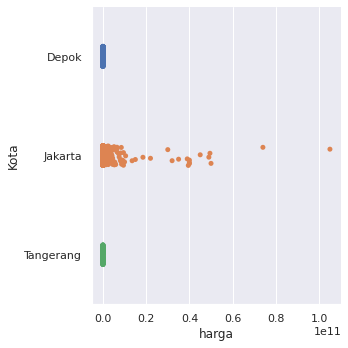

In [20]:
p = sns.catplot(x="harga", y="Kota", data = dg)

Berdasarkan plot diatas dapat dilihat bahwa harga rumah yang cenderung tinggi/mahal berada di kota Jakarta, sedangkan kota Depok dan Tangerang memiliki kisaran harga rumah yang cenderung lebih murah.
Sebaik 